In [1]:
import dmrg1 as dmrg1
import tdvp
import MPO_class as MPO

import matplotlib.pyplot as plt
import numpy as np

plt.rc('text',usetex=True)

In [2]:
L   = 64
chi = 64
h   = 0.5
hf  = 5/3

Hi = MPO.IsingMPO(L, h)
Hf = MPO.IsingMPO(L, hf)

engineDMRG = dmrg1.DMRG1(Hi)
engineDMRG.initialize(chi)

for i in range(20):
    engineDMRG.dmrg_step()

C:\Users\asant\Documents\GitHub\DMRG\LanczosRoutines.py:38: RuntimeWarning: beta[0] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


Quench in a TFIC\begin{equation}
H = -\sum_{i=1}^{L-1} \sigma^x_{i}\sigma^x_{i+1} -h \sum_{i=1}^L\sigma^z_i
\end{equation}

In [3]:
engineTDVP = tdvp.TDVP(engineDMRG.MPS, Hf)
engineTDVP.initialize()

dt = 0.01
T  = 5.

Mx = MPO.getMxMPO(L)

mx = np.zeros(int(T/dt)+1)
mx[0] = Mx.contractMPOMPS(engineTDVP.MPS).real

for n in range(1,int(T/dt)+1):
    engineTDVP.time_step(dt)
    mx[n] = Mx.contractMPOMPS(engineTDVP.MPS).real

C:\Users\asant\Documents\GitHub\DMRG\LanczosRoutines.py:38: RuntimeWarning: beta[3] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


Text(0.5, 1.0, '$h: 0.5 \\longrightarrow 5/3$')

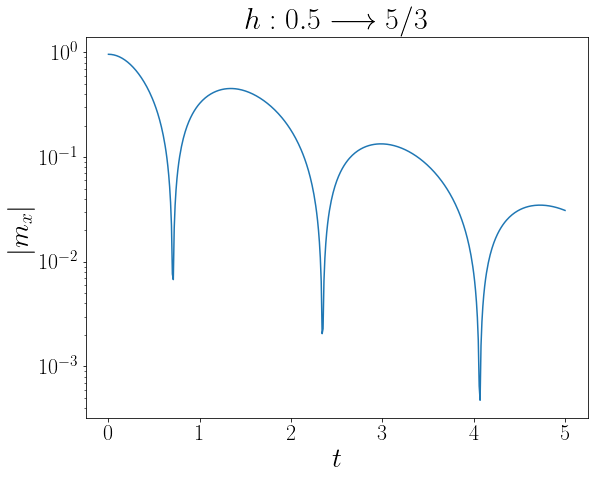

In [12]:
plt.figure(figsize=(9,7))
plt.plot(np.arange(0,mx.size)*dt,np.abs(mx/L))
plt.yscale('log')
plt.tick_params(labelsize=22)
plt.ylabel("$|m_x|$",fontsize=28)
plt.xlabel("$t$",fontsize=28)
plt.title("$h: 0.5 \longrightarrow 5/3$",fontsize=30)

as in https://iopscience.iop.org/article/10.1088/1742-5468/2012/07/P07016/pdf pp 11